In [1]:
import rlssm
import pandas as pd
import os

In [2]:
data = pd.read_csv('../../data/data_experiment.csv', index_col=0)
data = data[data.participant = 4].reset_index(drop=True)

data['S_cor'] = data['f_cor'].values
data['S_inc'] = data['f_inc'].values

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,S_cor,S_inc
0,1,1,1,43,39,2,1,1,1.244082,0,43,39
1,1,1,2,60,50,4,3,1,1.101821,1,60,50
2,1,1,3,44,36,4,2,2,1.029923,0,44,36
3,1,1,4,55,55,4,3,2,1.368007,0,55,55
4,1,1,5,52,49,4,3,3,1.039329,1,52,49


In [3]:
model = rlssm.ARDModel_2A(hierarchical_levels=1)

Using cached StanModel


In [4]:
# sampling parameters
n_iter = 700
n_chains = 2
n_thin = 5

In [5]:
model_fit = model.fit(data,
                      print_diagnostics=False,
                      thin = n_thin,
                      iter_warmup = n_iter,
                      iter_sampling = n_iter,
                      chains = n_chains)

INFO:cmdstanpy:CmdStan start processing


Fitting the model using the priors:
threshold_priors {'mu_mu': 1, 'sd_mu': 3, 'mu_sd': 0, 'sd_sd': 3}
ndt_priors {'mu_mu': 1, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 1}
v0_priors {'mu_mu': 9, 'sd_mu': 3, 'mu_sd': 2, 'sd_sd': 1}
ws_priors {'mu_mu': 0, 'sd_mu': 1, 'mu_sd': 2, 'sd_sd': 1}
wd_priors {'mu_mu': 3, 'sd_mu': 1, 'mu_sd': 3, 'sd_sd': 1}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [6]:
model_fit.rhat.describe()

,rhat
count,3377.000000
mean,343.000622
std,419.757101
min,1.100000
25%,9.500000
50%,177.000000
75%,457.000000
max,4492.000000


In [7]:
model_fit.rhat.head()

,rhat,variable
name,,
lp__,8.4,lp__
mu_threshold,310.0,mu_threshold
mu_ndt,400.0,mu_ndt
mu_v0,1100.0,mu_v0
mu_ws,2.7,mu_ws


In [8]:
model_fit.waic

{'lppd': -6838.519043212767,
 'p_waic': 19546.82933861125,
 'waic': 52770.69676364803,
 'waic_se': 2416.8190413487196}

### Posteriors

In [9]:
model_fit.samples

,transf_mu_threshold,transf_mu_ndt,transf_mu_v0,transf_mu_ws,transf_mu_wd,threshold_sbj[1],threshold_sbj[2],threshold_sbj[3],ndt_sbj[1],ndt_sbj[2],ndt_sbj[3],v0_sbj[1],v0_sbj[2],v0_sbj[3],ws_sbj[1],ws_sbj[2],ws_sbj[3],wd_sbj[1],wd_sbj[2],wd_sbj[3]
0,1.46040,0.937566,1.493690,0.268550,0.229286,1.50022,1.366240,1.508500,0.747094,0.270112,1.17619,1.23794,1.33478,1.65121,0.000065,2.15461,0.056566,0.045981,0.037635,0.229714
1,1.46027,0.937582,1.493900,0.268441,0.229281,1.50016,1.366010,1.508410,0.747166,0.270359,1.17436,1.23823,1.33495,1.65149,0.000066,2.14915,0.056175,0.045965,0.037619,0.230667
2,1.46043,0.937253,1.493950,0.268445,0.229288,1.50025,1.366120,1.508580,0.747077,0.270619,1.17168,1.23818,1.33495,1.65156,0.000066,2.14846,0.056215,0.045926,0.037613,0.227971
3,1.46041,0.937396,1.494100,0.267255,0.229283,1.50021,1.366170,1.508560,0.747391,0.271360,1.16814,1.23788,1.33502,1.65186,0.000065,2.14679,0.055141,0.045987,0.037692,0.224254
4,1.45984,0.936961,1.493820,0.266702,0.229293,1.49958,1.365750,1.507920,0.747705,0.272751,1.15569,1.23747,1.33470,1.65161,0.000064,2.14837,0.053879,0.045970,0.037667,0.221818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,1.87200,1.371990,0.636243,0.249775,1.149660,4.70789,0.624832,0.500550,0.010070,2.001060,1.03196,2.87676,2.18475,4.25926,0.000009,2.56062,0.048300,0.035660,0.037173,0.293092
276,1.87204,1.372040,0.636335,0.249766,1.149670,4.70752,0.624959,0.500582,0.010066,2.001080,1.03190,2.87669,2.18486,4.26020,0.000009,2.56104,0.048321,0.035658,0.037168,0.293329
277,1.87207,1.372020,0.636342,0.249778,1.149670,4.70758,0.625074,0.500539,0.010064,2.001110,1.03182,2.87666,2.18501,4.26018,0.000009,2.56108,0.048312,0.035653,0.037158,0.293227
278,1.87204,1.371940,0.636275,0.249709,1.149510,4.70673,0.625305,0.500683,0.010049,2.001210,1.03197,2.87719,2.18572,4.25908,0.000009,2.56056,0.048284,0.035687,0.037170,0.292605


In [10]:
model_fit.trial_samples

{'drift_cor_t': array([[ 1.42717,  1.70486,  1.61096, ..., 10.0112 , 10.0112 , 10.6507 ],
        [ 1.42746,  1.70509,  1.61119, ...,  9.98683,  9.98683, 10.6346 ],
        [ 1.42727,  1.70467,  1.61084, ...,  9.95564,  9.95564, 10.5896 ],
        ...,
        [ 3.01999,  3.23415,  3.16258, ..., 12.6618 , 12.6618 , 13.6931 ],
        [ 3.02065,  3.23501,  3.16338, ..., 12.65   , 12.65   , 13.6784 ],
        [ 3.02033,  3.23456,  3.16297, ..., 12.6042 , 12.6042 , 13.6329 ]]),
 'drift_inc_t': array([[1.05932 , 0.785251, 0.875272, ..., 4.03866 , 4.03866 , 2.381   ],
        [1.05975 , 0.785794, 0.875758, ..., 3.98949 , 3.98949 , 2.33057 ],
        [1.05987 , 0.786156, 0.876034, ..., 4.02838 , 4.02838 , 2.38259 ],
        ...,
        [2.73476 , 2.52109 , 2.59214 , ..., 5.0379  , 5.0379  , 3.13696 ],
        [2.73516 , 2.52128 , 2.59239 , ..., 5.04224 , 5.04224 , 3.14466 ],
        [2.73502 , 2.52129 , 2.59235 , ..., 5.01366 , 5.01366 , 3.1229  ]]),
 'threshold_t': array([[1.50022 , 1.5002

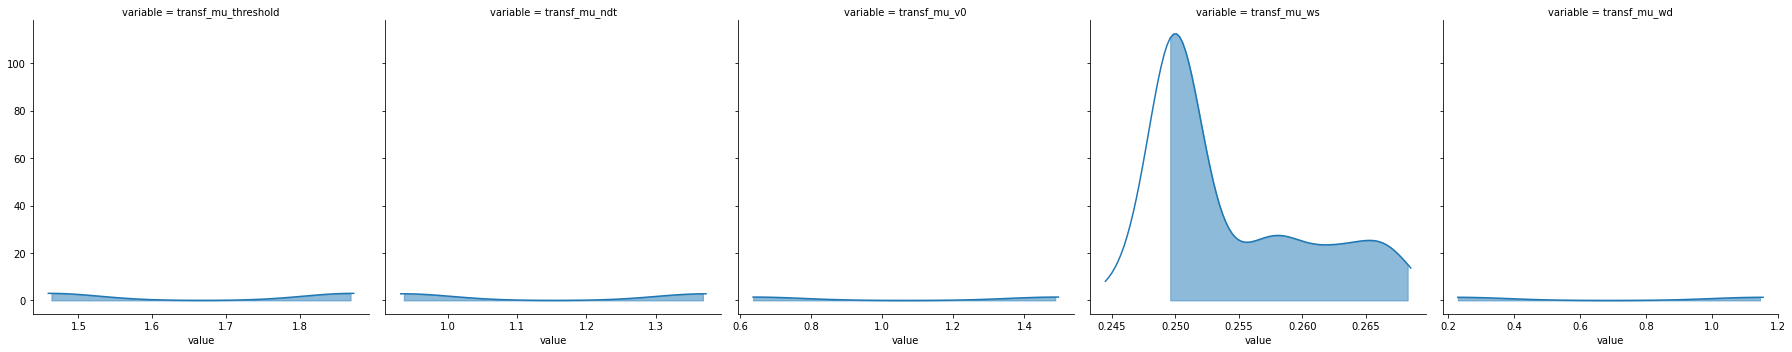

In [11]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

In [12]:
pp_rt, pp_acc = model_fit.get_posterior_predictives(n_posterior_predictives=100)

In [13]:
pp_rt

array([[1.262094, 1.426094, 1.845094, ..., 1.36319 , 1.26519 , 1.27119 ],
       [1.130166, 1.248166, 1.473166, ..., 1.32436 , 1.35136 , 1.27036 ],
       [1.934077, 1.759077, 2.493077, ..., 1.29168 , 1.33268 , 1.34168 ],
       ...,
       [1.394907, 1.083907, 1.316907, ..., 1.26784 , 1.34684 , 1.26084 ],
       [1.237914, 1.572914, 1.246914, ..., 1.33102 , 1.28502 , 1.25602 ],
       [1.396693, 1.077693, 1.201693, ..., 1.30316 , 1.24616 , 1.26816 ]])

In [14]:
pp_acc

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 1., 0., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [15]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_incorrect,quant_30_rt_incorrect,quant_50_rt_incorrect,quant_70_rt_incorrect,quant_90_rt_incorrect,quant_10_rt_correct,quant_30_rt_correct,quant_50_rt_correct,quant_70_rt_correct,quant_90_rt_correct
sample,,,,,,,,,,,,,
1,0.739917,1.038997,0.108537,0.277112,0.279912,1.293094,1.380513,1.728294,0.277112,0.279112,1.290190,1.344561,1.520694
2,0.787204,1.035626,-0.051845,0.277359,0.677043,1.296360,1.381560,1.656166,0.277359,0.279359,1.287763,1.346860,1.608166
3,0.746871,1.022795,0.044830,0.277619,0.983277,1.295878,1.363680,1.673777,0.277619,0.279619,1.280680,1.338680,1.519077
4,0.745480,1.034732,-0.015704,0.278360,1.014391,1.310140,1.381140,1.737991,0.278360,0.279860,1.285140,1.337765,1.527891
5,0.756606,1.025868,-0.145419,0.279751,1.151105,1.334690,1.433905,1.923705,0.279751,0.280751,1.266690,1.323690,1.474705
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.777469,1.024730,0.306705,0.281977,0.994572,1.262050,1.360972,1.925072,0.281977,0.283977,1.221072,1.286050,1.501868
97,0.721836,1.018002,0.126954,0.281877,0.282877,1.223462,1.326545,1.597804,0.281877,0.283877,1.227920,1.290520,1.589204
98,0.741307,1.022981,0.597429,0.281618,0.647262,1.235340,1.308374,1.648407,0.281618,0.283618,1.221840,1.295240,1.558707


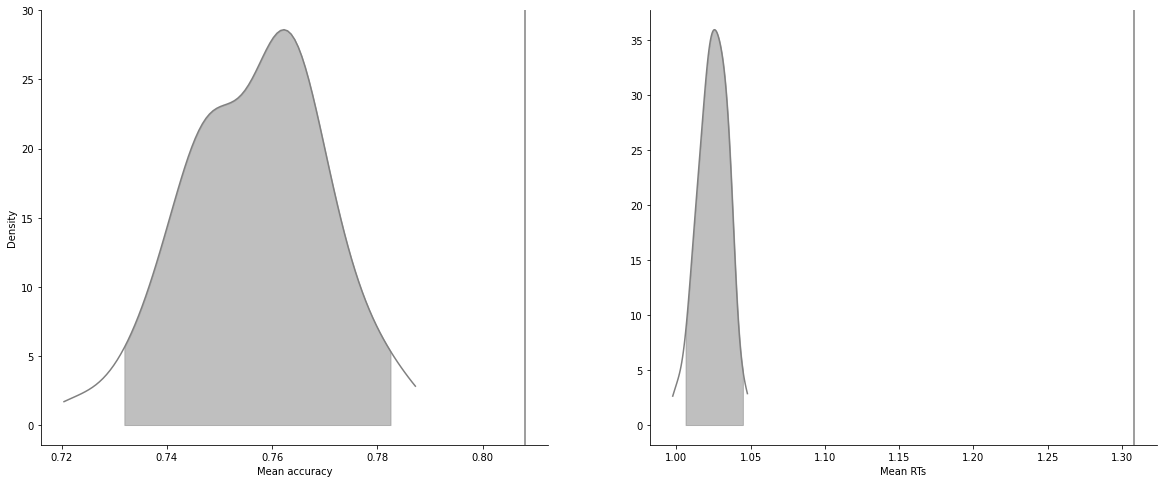

In [16]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

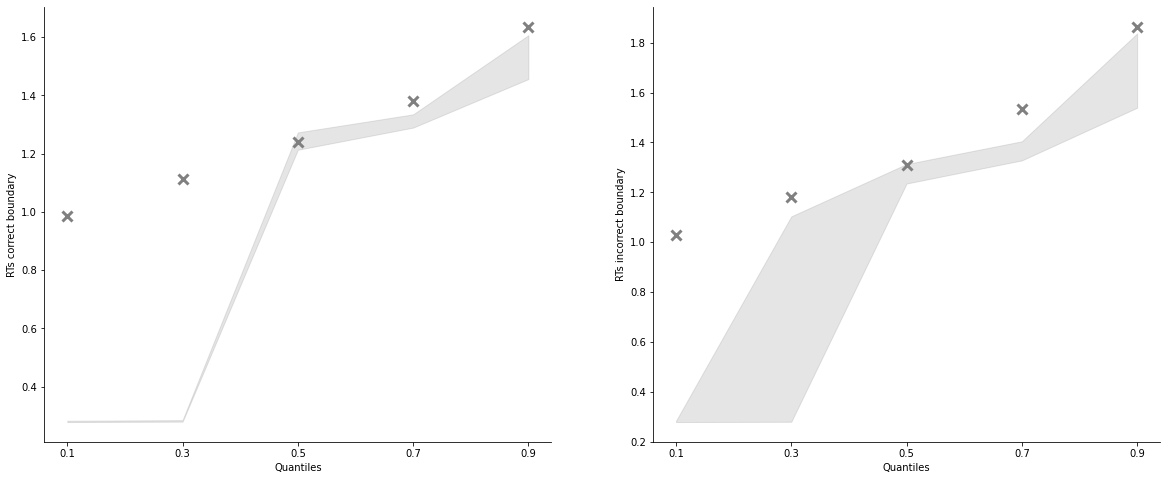

In [17]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

In [18]:
import numpy as np

In [19]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [20]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,S_cor,S_inc,accuracy_rescale,choice_pair,block_bins
0,0,1,1,1,43,39,2,1,1,1.244082,0,43,39,2,AB,1
1,1,1,1,2,60,50,4,3,1,1.101821,1,60,50,1,CD,1
2,2,1,1,3,44,36,4,2,2,1.029923,0,44,36,2,BD,1
3,3,1,1,4,55,55,4,3,2,1.368007,0,55,55,2,CD,1
4,4,1,1,5,52,49,4,3,3,1.039329,1,52,49,1,CD,1


In [21]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1           AB          1            0.779661  1.060912 -0.284350   
                        2            0.610169  1.089260 -0.084020   
                        3            0.694915  1.080778 -0.232449   
                        4            0.627119  1.032838 -0.167426   
                        5            0.677966  1.022528 -0.328360   
...                                       ...       ...       ...   
3           CD          96           0.716667  1.048016  0.097394   
                        97           0.716667  1.003400  0.170811   
                        98           0.700000  1.019855  0.264019   
                        99           0.733333  1.024094  0.093485   
                        100          0.683333  1.034102  0.026596   

                                quant_30_rt_incorrect  quant_30_rt_correct  \
block_label choice_pair sample                                               
1           AB          1                    1.130694             0.280112   
                        2                    1.305960             0.279359   
                        3                    1.093177             0.280619   
                        4                    1.125491             0.280360   
                        5                    1.261496             0.281751   
...                                               ...                  ...   
3           CD          96                   1.195854             0.281977   
                        97                   1.215404             0.281877   
                        98                   1.187147             0.281618   
                        99                   1.268520             0.281698   
                        100                  1.170693             0.281652   

                                quant_50_rt_incorrect  quant_50_rt_correct  \
block_label choice_pair sample                                               
1           AB          1                    1.367190             1.282190   
                        2                    1.328360             1.303860   
                        3                    1.335680             1.323680   
                        4                    1.336266             1.201391   
                        5                    1.314705             1.249690   
...                                               ...                  ...   
3           CD          96                   1.342050             1.215072   
                        97                   1.273920             1.177004   
                        98                   1.250873             1.206340   
                        99                   1.293467             1.180967   
                        100                  1.308160             1.225160   

                                quant_70_rt_incorrect  quant_70_rt_correct  
block_label choice_pair sample                                              
1           AB          1                    1.496552             1.347190  
                        2                    1.380244             1.378860  
                        3                    1.367237             1.394077  
                        4                    1.372340             1.343340  
                        5                    1.373890             1.334090  
...                                               ...                  ...  
3           CD          96                   1.678872             1.271050  
                        97                   1.388404             1.265720  
                        98                   1.343900             1.283440  
                        99                   1.410467             1.276620  
                        100                  1.402080             1.270160  

[1200 rows x 9 columns]

In [22]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_incorrect  \
block_bins sample                                                             
1          1            0.811111  1.031043 -0.080674               0.278112   
           2            0.700000  1.027562 -0.198865               1.203166   
           3            0.777778  1.035259  0.037485               1.025577   
           4            0.722222  1.037686  0.180652               0.279560   
           5            0.744444  0.992549 -0.396343               1.126705   
...                          ...       ...       ...                    ...   
8          96           0.764045  1.049079  0.167730               0.282977   
           97           0.730337  1.023912  0.018759               1.216528   
           98           0.719101  1.073037  0.279021               1.118707   
           99           0.752809  1.029587  0.188500               0.282998   
           100          0.764045  1.003208 -0.311430               0.283652   

                   quant_30_rt_correct  quant_50_rt_incorrect  \
block_bins sample                                               
1          1                  0.984894               0.280112   
           2                  0.278359               1.340166   
           3                  0.279319               1.211378   
           4                  1.005591               1.252391   
           5                  0.281751               1.312690   
...                                ...                    ...   
8          96                 0.283977               1.222050   
           97                 0.283877               1.320420   
           98                 0.282618               1.263840   
           99                 0.283698               1.302020   
           100                0.283652               1.141693   

                   quant_50_rt_correct  quant_70_rt_incorrect  \
block_bins sample                                               
1          1                  1.305094               1.361713   
           2                  1.293360               1.411160   
           3                  1.302680               1.344858   
           4                  1.297391               1.404741   
           5                  1.245705               1.360290   
...                                ...                    ...   
8          96                 1.233561               1.316050   
           97                 1.219920               1.442704   
           98                 1.245340               1.352894   
           99                 1.211020               1.340220   
           100                1.226660               1.358160   

                   quant_70_rt_correct  
block_bins sample                       
1          1                  1.349590  
           2                  1.347244  
           3                  1.343380  
           4                  1.338341  
           5                  1.332290  
...                                ...  
8          96                 1.303550  
           97                 1.301720  
           98                 1.329300  
           99                 1.277620  
           100                1.325060  

[800 rows x 9 columns]

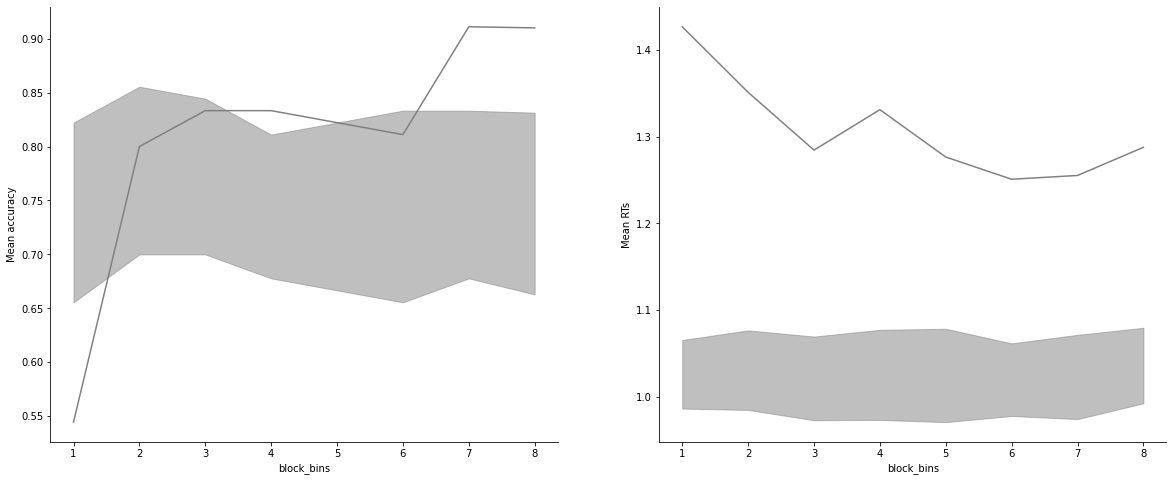

In [23]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

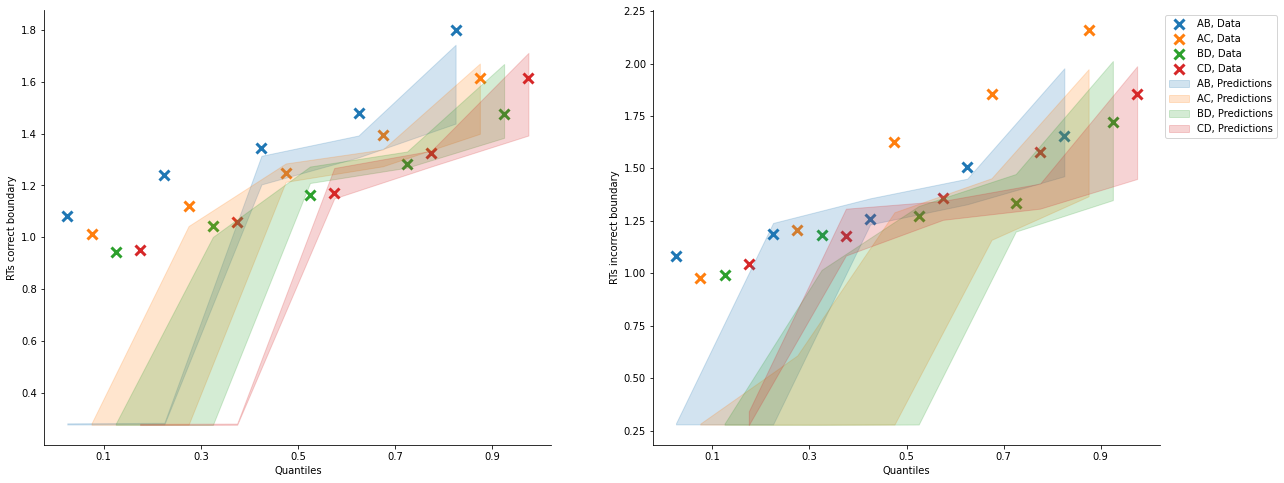

In [24]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);